# Fall 2022 Data science intern challenge

[Source](https://docs.google.com/document/d/1JxYz-VZHIctOQcw1PIUvCuYouxDWnew5yzBhluVwbso/edit#)

In [1]:
import pandas as pd
import seaborn as sns

**Question 1**: Given some sample data, write a program to answer the following: [click here](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0) to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

* Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
* What metric would you report for this dataset?
* What is its value?


In [2]:
df = pd.read_csv('challenge.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [3]:
df.info() # 5000 entries,none of them null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
# we are interested in statistics of 30 days

df['order_date'] = df['created_at'].apply(lambda x: x.split(' ')[0])
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_date
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,2017-03-01


In [5]:
df['order_date'].apply(lambda x: x.split('-')[1]).value_counts() # all the orders are from same month

03    5000
Name: order_date, dtype: int64

In [6]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

 **Observations**
 * 75% of the values in order amount are lesser than 390
 * max amount is way larger than most values
 * standard deviation is quite large as a result
 
**All of these suggest at presence of potential outliers**

<AxesSubplot:>

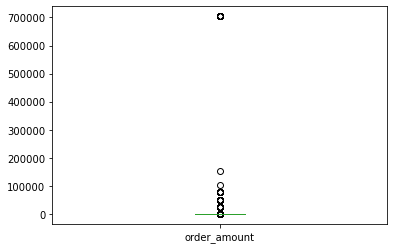

In [7]:
df['order_amount'].plot(kind='box') # as can be seen here, there are outliers

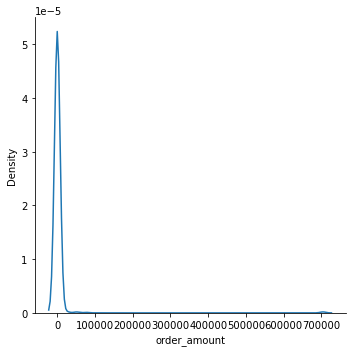

In [8]:
sns.displot(df['order_amount'], kind="kde")
# probability of large order amount is very low

**A better metric would be median in this case which is 284**

In [9]:
df['order_amount'].median()

284.0

## Question 2

For this question you’ll need to use SQL. Follow this [link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

**a. How many orders were shipped by Speedy Express in total?**

`SELECT Count(*) 
FROM [Orders] 
WHERE ShipperID = (SELECT ShipperID FROM Shippers WHERE ShipperName = 'Speedy Express');`

\>  54


**b. What is the last name of the employee with the most orders?**

`SELECT Employees.LastName, COUNT() AS num_orders FROM Orders
JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName ORDER BY num_orders DESC LIMIT 1 ;`

\> peacock, 40 orders

**c. What product was ordered the most by customers in Germany?**

`SELECT Products.ProductName, Sum(OrderDetails.Quantity) AS most_ordered FROM Orders
JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
JOIN Products ON OrderDetails.ProductID = Products.ProductID
WHERE Orders.CustomerID IN ( SELECT CustomerID FROM Customers WHERE Country  = 'Germany')
GROUP BY Products.ProductName ORDER BY most_ordered DESC LIMIT 1;`

\> Boston Crab Meat, quantity=160 